In [23]:
import pandas as pd
from pathlib import Path
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [19]:
subid = '1001'
dataroot = Path("/mnt/h/3Tpioneer_bids")
work_home = Path("/mnt/h/srs-9/longitudinal")
work_dir = work_home / f"sub{subid}"
data_dir = Path("/home/srs-9/Projects/ms_mri/analysis/thalamus/data0")

with open(dataroot / "subject-sessions-longit.json", 'r') as f:
    subjects = json.load(f)
sessions = sorted(subjects[subid])

In [17]:
session_volumes  = defaultdict(list)
for sesid in sessions:
    ses_data = pd.read_csv(work_dir / "left" / f"hipsthomas_vols_jacobians-{sesid}.csv", index_col="struct")
    for i in ses_data.index:
        session_volumes[i].append(ses_data.loc[i, 'volumes'] / np.exp(ses_data.loc[i, 'jac_det']))

df = pd.DataFrame(session_volumes, index=sessions)

In [18]:
session_volumes = defaultdict(list)
for sesid in sessions:
    ses_data = pd.read_csv(work_dir / "left" / f"hipsthomas_vols_jacobians-{sesid}.csv", index_col="struct")
    session_volumes[sesid] = [row['volumes'] / np.exp(row['jac_det']) for _,row in ses_data.iterrows()]

df = pd.DataFrame(session_volumes, index=ses_data.index)

In [22]:
changes = [(row[sessions[0]] - row[sessions[-1]])/row[sessions[0]] for _,row in df.iterrows()]

In [20]:
df_dists = pd.read_csv(data_dir / "centroid-SDT.csv", index_col="subid")

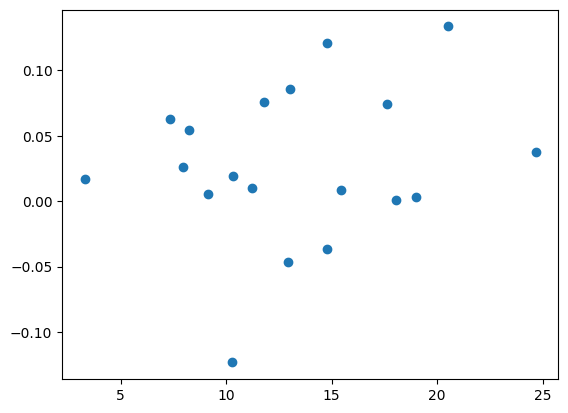

In [24]:
plt.scatter(df_dists.loc[1001, :], changes)